# Exploratory Data Analysis

This Jupyter notebook contains some preeliminary analysis of the [FAOSTAT Agriculture Data](https://www.kaggle.com/datasets/vijayveersingh/faostat-crops-and-livestock-data?select=Production_Crops_Livestock_E_All_Data_NOFLAG.csv) and its relation with the [Banana Index](https://www.kaggle.com/datasets/joebeachcapital/banana-index) . It's main objective is to show some of the basic analysis that can be done using information of the FAOSTAT database, and some cases that will require some simple data pre-prosessing to avoid, for example, double counting and mixing information of different units or diferent types of areas. It also show the food that are in the intersection between both databases and some key values.

In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [223]:
#Load only some parts of the database that are relevant fot this preeliminar analysis
database_path = 'Production_Crops_Livestock_E_All_Data.csv'
fields = ['Area Code (M49)', 'Area', 'Element', 'Item Code', 'Item', 'Unit', 'Y1961', 'Y2022', 'Y2023']
df = pd.read_csv(database_path, skipinitialspace=True, usecols=fields)

# Items and Areas

Despite the database contains **79711** entries, it contains only **302** different items, and **245** different areas.The `Area Code (M49)` in the dataset does not only contain codes per country but also per contient, per some regions (like `Small Island Developing States`), and one code for the `World`. If working with this codes, it is necesary to be aware of it to avoid mixing different types of regions.

In [224]:
print('Number of different items = ',df['Item Code'].value_counts().size)
print('Number of different areas = ',df['Area'].value_counts().size) 

Number of different items =  302
Number of different areas =  245


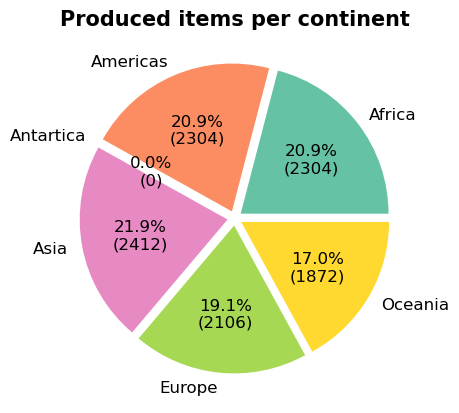

In [225]:
#List of continents
continents = ["Africa", "Americas", "Antartica", "Asia", "Europe", "Oceania"]

#initialize list of frequency
freq = list()

for place in continents:
    #Filter by continent
    df_continent = df.loc[df['Area'] == place]
    #Filter by Production of each element (to avoid doublecount elements)
    freq.append( df_continent.loc[df_continent['Element'] == "Production"].size )

#Format to display percentage and frequency on pie chart
def format_pie(pct, all_vals):
    absolute = int(round(pct/100.0 * sum(all_vals)))
    return f"{pct:.1f}%\n({absolute})"

#Create and pie chart
fig, ax = plt.subplots()
ax.set_title("Produced items per continent", fontsize=15, fontweight="bold")
plt.pie(freq, labels=continents, 
        autopct=lambda pct: format_pie(pct, freq),
        textprops={'fontsize': 12},
        colors=sns.color_palette('Set2'), 
        explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05])

#Display pie chart
plt.show()

## Areas

As excpected, whithout filtering area by country, the one that produces the more variety of items is the `World`, followed by some big reagions that cover several countries, like `Asia` and `Land Locked Developing Countries`. Nevertheless, there are some countries that are between these big regions, which are `China`, `China mainland`, and `Spain`. On the other hand, the countries that producess less variety of items are small islands like `Marshall Islands`, `Faroe Islands` and `Tokelau`.

<Axes: title={'center': '30 areas that produces the least amount of different items'}, ylabel='Number of different items'>

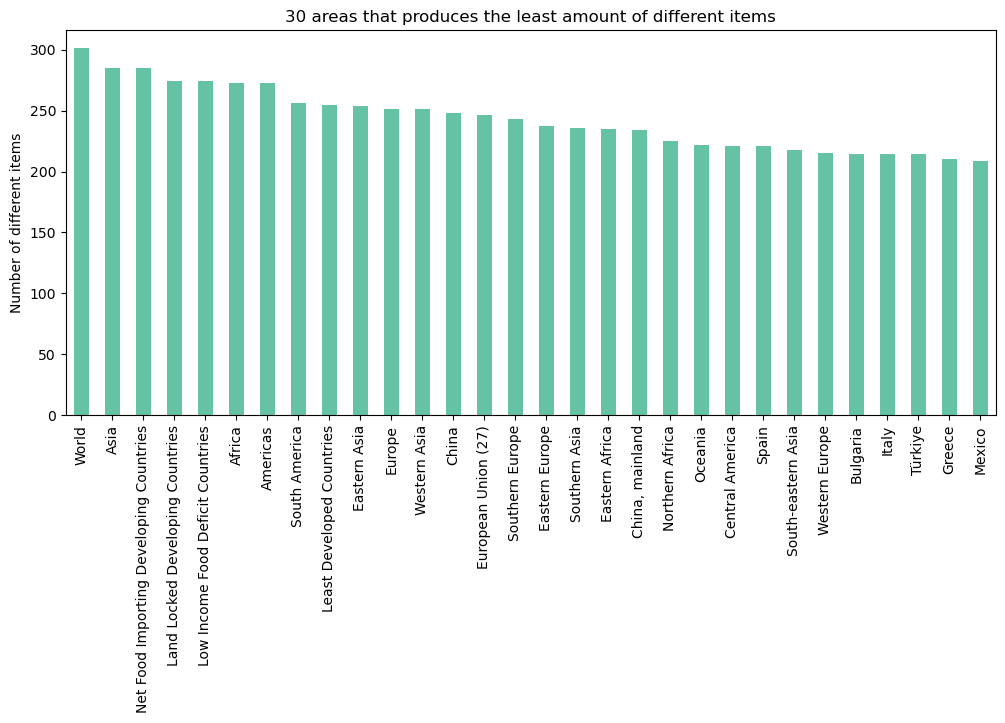

In [226]:
#Items in area avoiding doublecounting (for duplicated entries due to different units and elements)
items_in_area = df[['Area', 'Item']].drop_duplicates()

#group by area and count the frequency of area (same as the different items produced per area)
number_items_in_area = items_in_area.groupby('Area').size().reset_index(name='Unique Items')

#make the plot
number_items_in_area.nlargest(30, "Unique Items"). plot(kind='bar',  
                                                        x='Area', 
                                                        xlabel='',
                                                        title='30 areas that produces the least amount of different items',
                                                        ylabel='Number of different items', 
                                                        legend=False,
                                                        figsize=[12,5],
                                                        color=sns.color_palette("Set2")[0],
                                                        )


<Axes: title={'center': '30 areas that produces the least amount of different items'}, ylabel='Number of different items'>

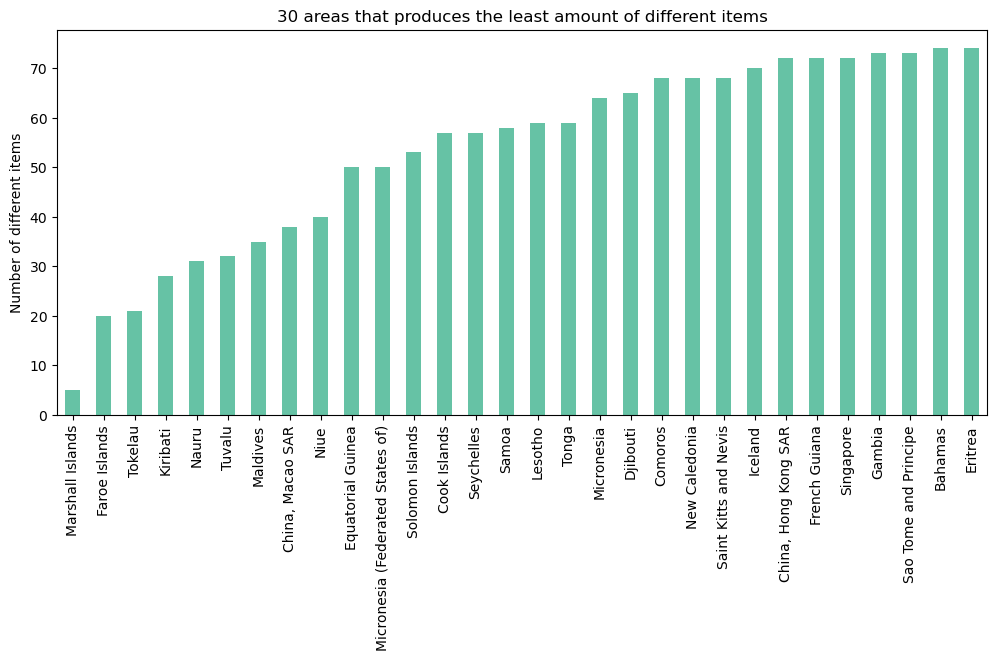

In [227]:
number_items_in_area.nsmallest(30, "Unique Items"). plot(kind='bar',  
                                                        x='Area',
                                                        xlabel='',
                                                        title='30 areas that produces the least amount of different items', 
                                                        ylabel='Number of different items', 
                                                        legend=False,
                                                        figsize=[12,5],
                                                         color=sns.color_palette("Set2")[0],
                                                        )


## Items

Many of the most produced items by different areas incorporate more specific items, like for example `total meat` and `fruit primarly`, nevertheless, there are some other that are less general, like `fresh hen eggs in shell`. On top of that, is easy to note that most of the items are animal-based food. On the other hand, `butter of goat milk` is produced only in one area, and `jojoba seeds` are the second lest produced item by different areas. 

<Axes: title={'center': '30 items most produced by different areas'}, ylabel='Number of different Areas'>

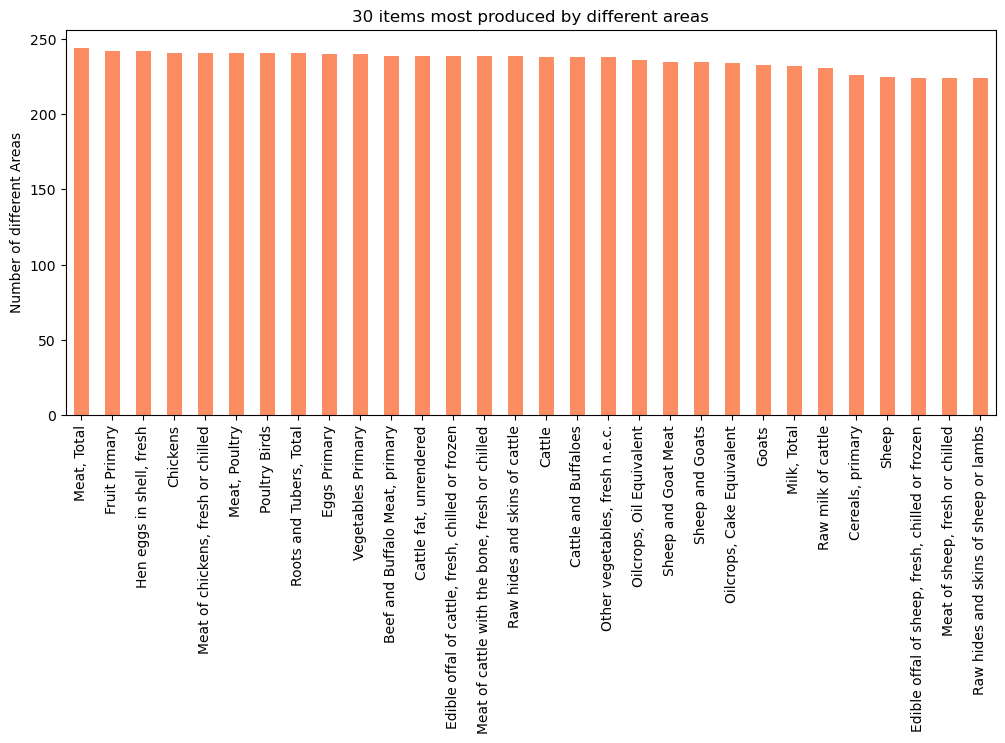

In [228]:

#group by area and count the frequency of area (same as the different items produced per area)
number_areas_in_item = items_in_area.groupby('Item').size().reset_index(name='Unique Areas')

number_areas_in_item.nlargest(30, "Unique Areas").plot(kind='bar',
                                                       x='Item',
                                                       xlabel='',
                                                       title='30 items most produced by different areas',
                                                       ylabel='Number of different Areas',
                                                       legend=False,
                                                       figsize=[12,5],
                                                       color=sns.color_palette("Set2")[1],
                                                       )



<Axes: title={'center': '30 items least produced by different areas'}, ylabel='Number of different Areas'>

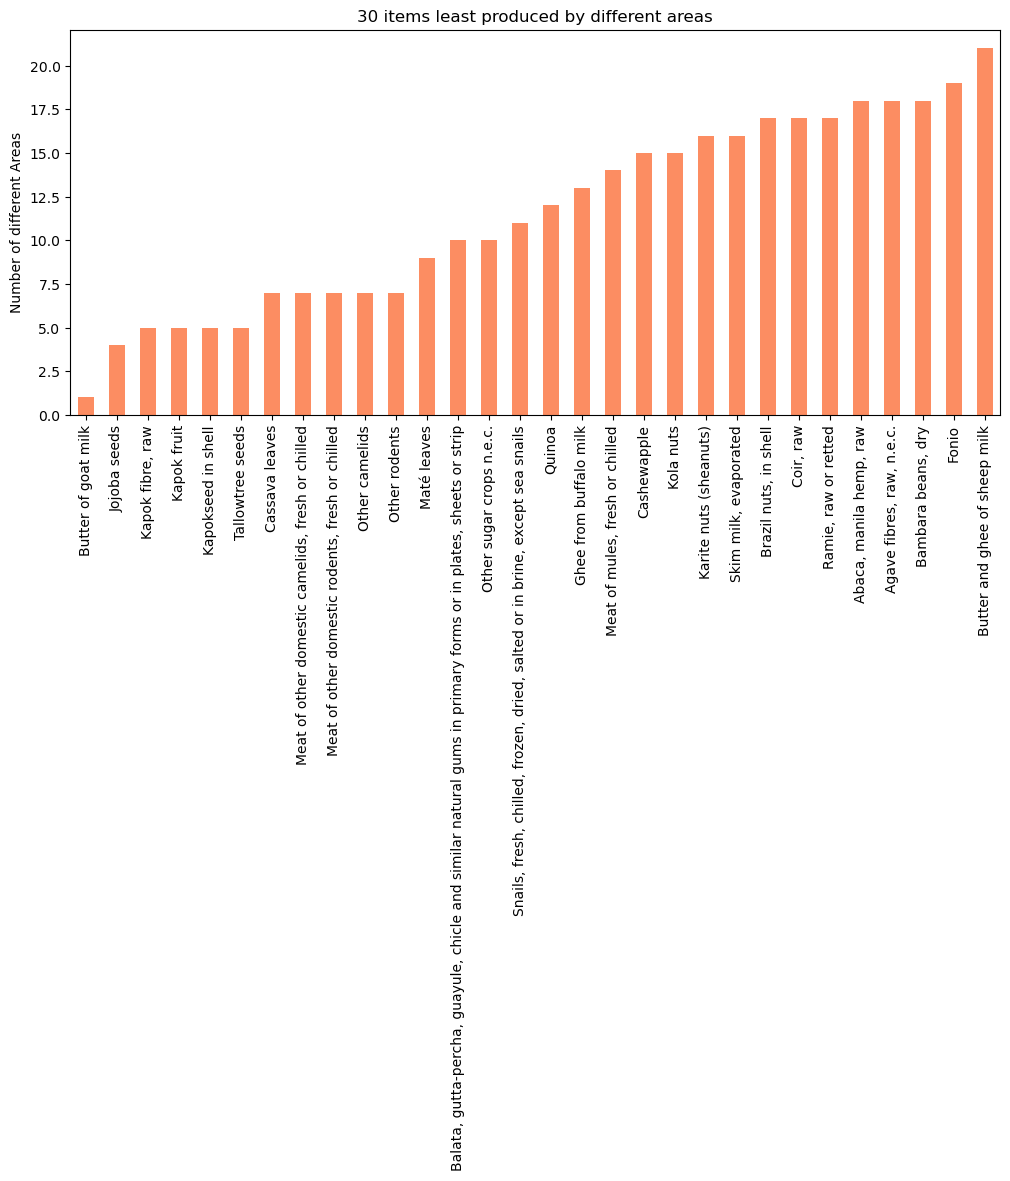

In [229]:
#group by area and count the frequency of area (same as the different items produced per area)
number_areas_in_item = items_in_area.groupby('Item').size().reset_index(name='Unique Areas')

number_areas_in_item.nsmallest(30, "Unique Areas").plot(kind='bar',
                                                       x='Item',
                                                       xlabel='',
                                                       title='30 items least produced by different areas',
                                                       ylabel='Number of different Areas',
                                                       legend=False,
                                                       figsize=[12,5],
                                                        color=sns.color_palette("Set2")[1],
                                                       )

### Items in the world

The majority of the most produced items in the word are plant-based foods, like `primary cereals` and `sugar cane`. However, there are some animal-based foods, like `total milk` and `total meat` that are also some of the most produced items.

The overall items production has increased from 1961 to 2023. The majority of the 30 most produced items has remain in the top only switching places, like `total roots and tubers` that went from 3rd to 8th position, and `primary vegetables` climbing from 12th to 5th position.   

<Axes: title={'center': '30 items most produced in the world in 2023'}, ylabel='tons'>

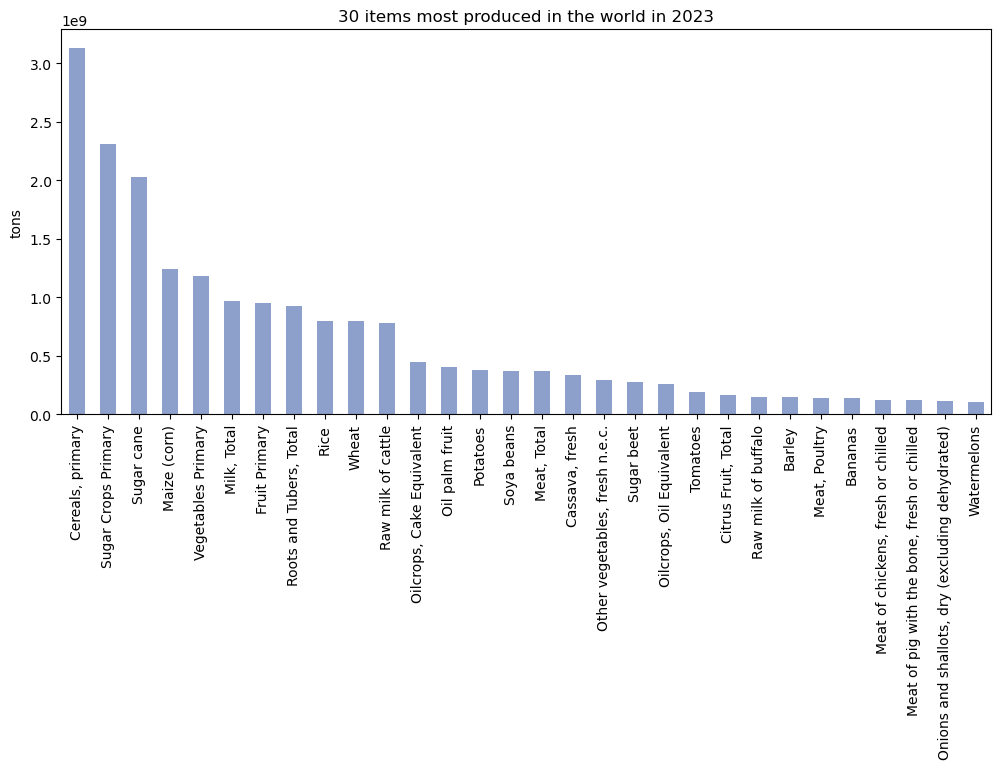

In [230]:
#Items in area avoiding doublecounting (for duplicatedentries due to different units and elements)
df[['Item', 'Y2023']].loc[(df['Element'] == "Production") & (df['Unit'] == "t")&(df['Area'] == "World")].nlargest(30, 'Y2023').plot(kind='bar', 
                                                        x="Item",
                                                        xlabel='',
                                                       title='30 items most produced in the world in 2023',
                                                       ylabel='tons',
                                                       legend=False,
                                                       figsize=[12,5],
                                                        color=sns.color_palette("Set2")[2],                                                   
                                                        )

<Axes: title={'center': '30 items most produced items in the world in 1961'}, ylabel='tons'>

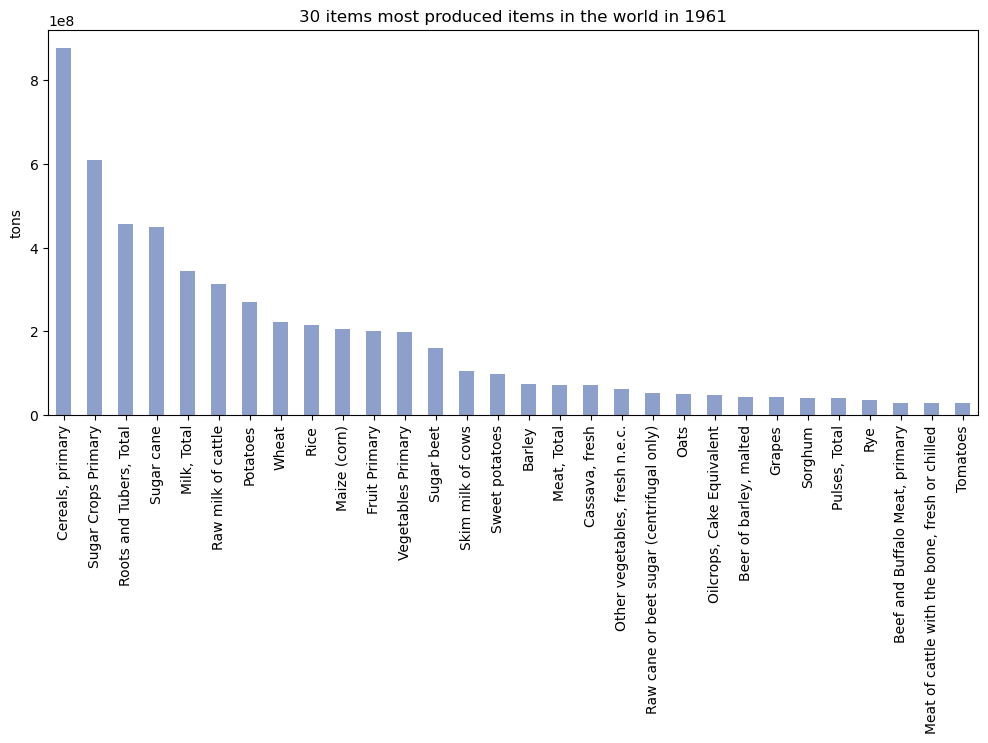

In [231]:
df[['Item', 'Y1961']].loc[(df['Element'] == "Production") & (df['Unit'] == "t")&(df['Area'] == "World")].nlargest(30, 'Y1961').plot(kind='bar', 
                                                        x="Item",
                                                        xlabel='',
                                                       title='30 items most produced items in the world in 1961',
                                                       ylabel='tons',
                                                       legend=False,
                                                       figsize=[12,5],
                                                        color=sns.color_palette("Set2")[2],                                                   
                                                        )

The three most eficient items (in terms of `yield` in `kg/ha`)  in 2023 are the `cucumbers and gherkins` produced in Netherlands, Iceland and Oman. It is also easy to note that `tomatoes` from different regiosnare also some of the items with higher yield.

<Axes: title={'center': '30 items with highest yield in 2023'}, ylabel='kg/ha'>

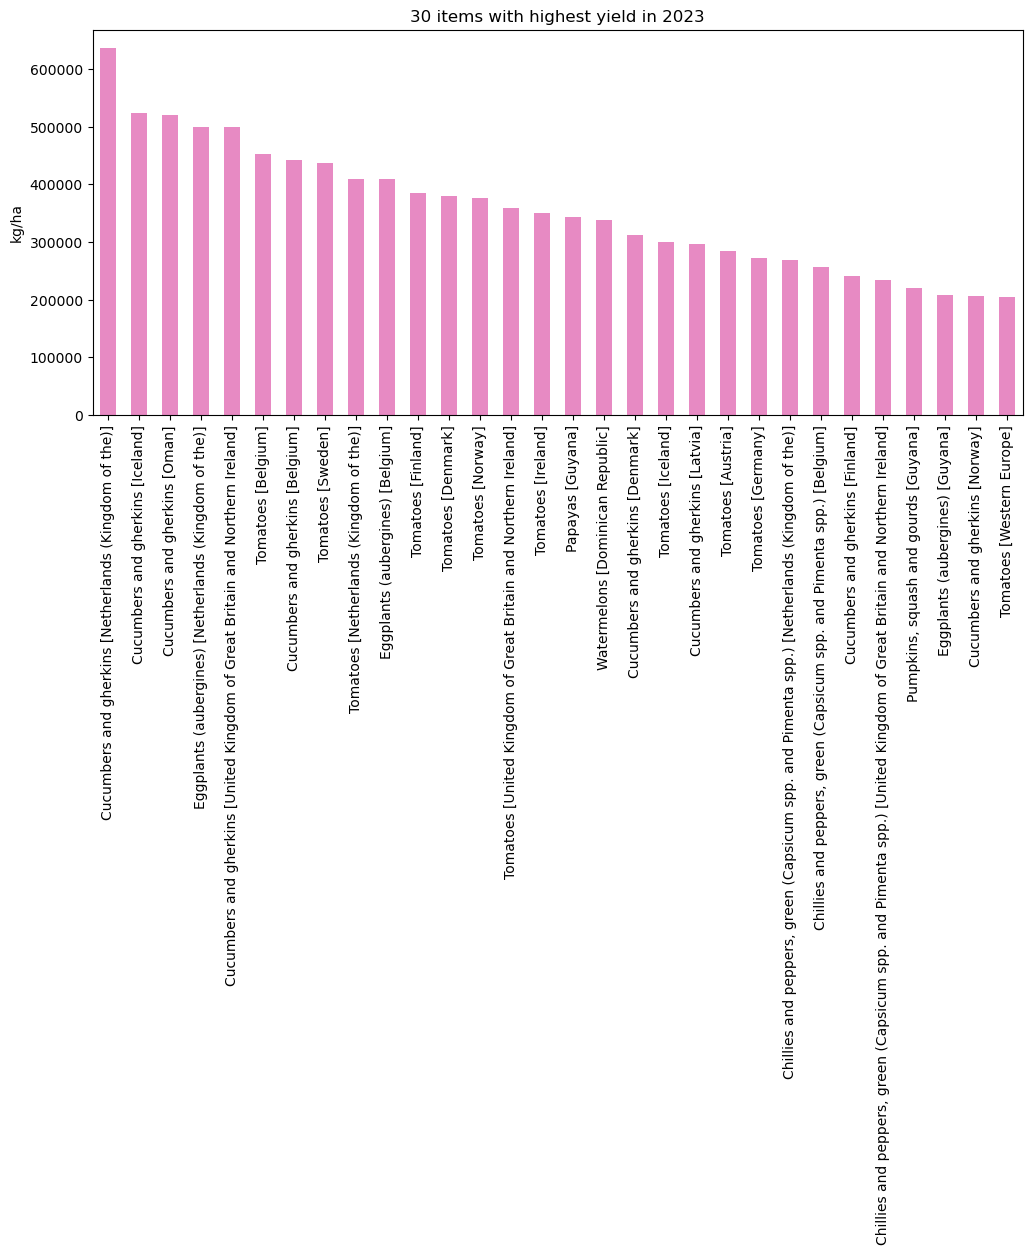

In [232]:
#Items in area avoiding doublecounting (for duplicated entries due to different units and elements)
df['Item_Area'] = df['Item'] + " [" + df['Area'] + "]"
df[['Item_Area', 'Y2023']].loc[(df['Element'] == "Yield") & (df['Unit'] == "kg/ha") &(df['Area'] != "World")].nlargest(30, 'Y2023').plot(kind='bar', 
                                                        x="Item_Area",
                                                        xlabel='',
                                                       title='30 items with highest yield in 2023',
                                                       ylabel='kg/ha',
                                                       legend=False,
                                                       figsize=[12,5],
                                                        color=sns.color_palette("Set2")[3],                                                   
                                                        )

# Banana Index intersection with FAOSTAT
It contains **160** entries, of which some of them are food ingredients (like ```Avocados```) and the others are prepared dishes (like ```Caesar salad```). Due to the type of foods in the FAOSTAT database, only some of the food ingredients from the Banana index database will be found on it.

In [233]:
df_banana["entity"].size

160

In [234]:
#Load database
database_path = './bananaindex.csv'
df_banana = pd.read_csv(database_path)

For utilizing this database alongside with the FAOSTAT database, we must find the equivalent entry names. Sometimes the equivalent is exactly the same (like ```Apples``` and ```Apples```), sometimes one is more descriptive (like ```Almonds``` and ```Almonds, in shell```), and sometimes there are several possible equivalents and one has to filter them by hand based on previous knowledge and intuition (like ```Butter``` and ```Butter of cow milk```).

In [235]:
#First filter 

cont = 0
food_both = dict()

#Dictionary with the exact food name  on both datasets
for food_1 in df_banana['entity']:
    for food_2 in df['Item'].drop_duplicates():
        if food_1.lower() == food_2.lower() :
            food_both[food_1] = [food_1, food_2]
            cont += 1


for food_1 in df_banana['entity']:
    cont = 0
    for food_2 in df['Item'].drop_duplicates():    

        #filter if one food name is part of the other (with and without capital letters)
        if food_1 in food_2 and food_1 not in food_both.keys() :
            food_both[sorted([food_1,food_2], key=len)[0]] = [food_1,food_2]
            if cont > 0:
                food_both.popitem()
            cont += 1
        elif "".join((" ",food_1.lower())) in food_2.lower() and food_1 not in food_both.keys():
            food_both[sorted([food_1,food_2], key=len)[0]] = [food_1,food_2]
            if cont > 0:
                food_both.popitem()
            cont += 1
        elif food_2 in food_1 and food_2 not in food_both.keys() :
            food_both[sorted([food_1,food_2], key=len)[0]] = [food_1,food_2]
            if cont > 0:
                food_both.popitem()
            cont += 1
        elif "".join((" ",food_2.lower())) in food_1.lower() and food_2 not in food_both.keys():
            food_both[sorted([food_1,food_2], key=len)[0]] = [food_1,food_2]
            if cont > 0:
                food_both.popitem()
            cont += 1

        #Give priority when the capital letter match
        if food_1 in food_2 and food_1 in food_both.keys():
            del food_both[food_1]
            food_both[food_1] = [food_1, food_2]
        elif food_2 in food_1 and food_1 in food_both.keys():
            del food_both[food_2]
            food_both[food_2] = [food_1, food_2]

In [236]:
#check dictionary
for key in food_both.keys():
    print(key, food_both[key])

Almonds ['Almonds', 'Almonds, in shell']
Apples ['Apples', 'Apples']
Asparagus ['Asparagus', 'Asparagus']
Avocados ['Avocados', 'Avocados']
Bananas ['Bananas', 'Bananas']
Beans ['Beans', 'Beans, dry']
Beer ['Beer', 'Beer of barley, malted']
Brazil nuts ['Brazil nuts', 'Brazil nuts, in shell']
Broccoli ['Broccoli', 'Cauliflowers and broccoli']
Butter ['Butter', 'Butter of goat milk']
Cabbage ['Cabbage', 'Cabbages']
Carrots ['Carrots', 'Carrots and turnips']
Cashew nuts ['Cashew nuts', 'Cashew nuts, in shell']
Cauliflower ['Cauliflower', 'Cauliflowers and broccoli']
Coconut oil ['Coconut oil', 'Coconut oil']
Cucumber ['Cucumber', 'Cucumbers and gherkins']
Eggs ['Eggs', 'Eggs from other birds in shell, fresh, n.e.c.']
Grapes ['Grapes', 'Grapes']
Lemons ['Lemons', 'Lemons and limes']
Lentils ['Lentils', 'Lentils, dry']
Lettuce ['Lettuce', 'Lettuce and chicory']
Limes ['Limes', 'Lemons and limes']
Melon ['Melon', 'Melonseed']
Mushrooms ['Mushrooms', 'Mushrooms and truffles']
Olive oil ['Oli

In [237]:
#Check specific item name in FAOSTAT dataset
for item in df["Item"].drop_duplicates():
    if "pig" in item.lower():
        print(item)

Edible offal of pigs, fresh, chilled or frozen
Fat of pigs
Meat of pig with the bone, fresh or chilled
Swine / pigs
Pig fat, rendered
Pigeon peas, dry
Meat of pigeons and other birds n.e.c., fresh, chilled or frozen


In [238]:
#Check specific item name in banana index
for item in df_banana["entity"]:
    if "pork" in item.lower():
        print(item)

Pork chops
Pork sausages


In [239]:
#Fix some entries by hand
if "Sugar" in food_both.keys():
    del food_both["Sugar"] # sugar crops vs processed suggar
food_both["Eggs"] = ["Eggs", "Hen eggs in shell, fresh"] # Refered to Hen eggs and not eggs from other birds in shell
food_both["Butter"] = ["Butter", "Butter of cow milk"] # of cow milk and not goat milk
food_both["Beef mince"] = ["Beef mince", "Beef and Buffalo Meat, primary" ] #Closest meat match
food_both["Beef steak"] = ["Beef steak", "Beef and Buffalo Meat, primary" ] #Closest meat match
food_both["Milk"] = ["Cow’s milk", "Skim milk of cows"] #closest cow milk match
food_both["Goat cheese"] = ["Goat’s cheese", "Cheese from milk of goats, fresh or processed"]
food_both["Chicken breast"] = ["Chicken breast", "Meat of chickens, fresh or chilled"]
food_both["Chicken thighs"] = ["Chicken thighs", "Meat of chickens, fresh or chilled"]
food_both["Chicken wings"] = ["Chicken wings", "Meat of chickens, fresh or chilled"]
food_both["Pork chops"] = ["Pork chops", "Meat of pig with the bone, fresh or chilled"]

In [240]:
#Final result
print("There are ", len(food_both.keys()), " ingredients in common between both databases, which are ( key[banana_index_name, FAOSTAT_name] ):")
print("")
for key in food_both.keys():
    print(key, food_both[key])

There are  49  ingredients in common between both databases, which are ( key[banana_index_name, FAOSTAT_name] ):

Almonds ['Almonds', 'Almonds, in shell']
Apples ['Apples', 'Apples']
Asparagus ['Asparagus', 'Asparagus']
Avocados ['Avocados', 'Avocados']
Bananas ['Bananas', 'Bananas']
Beans ['Beans', 'Beans, dry']
Beer ['Beer', 'Beer of barley, malted']
Brazil nuts ['Brazil nuts', 'Brazil nuts, in shell']
Broccoli ['Broccoli', 'Cauliflowers and broccoli']
Butter ['Butter', 'Butter of cow milk']
Cabbage ['Cabbage', 'Cabbages']
Carrots ['Carrots', 'Carrots and turnips']
Cashew nuts ['Cashew nuts', 'Cashew nuts, in shell']
Cauliflower ['Cauliflower', 'Cauliflowers and broccoli']
Coconut oil ['Coconut oil', 'Coconut oil']
Cucumber ['Cucumber', 'Cucumbers and gherkins']
Eggs ['Eggs', 'Hen eggs in shell, fresh']
Grapes ['Grapes', 'Grapes']
Lemons ['Lemons', 'Lemons and limes']
Lentils ['Lentils', 'Lentils, dry']
Lettuce ['Lettuce', 'Lettuce and chicory']
Limes ['Limes', 'Lemons and limes']
Me

# Both datasets

There are only **49** foods in the intersection between the FAOSTAT database and the Banana index database, which represent only the **16.2%** and **30.6%** respectively of the whole food diversity per database. However, taking into account that not all the food items has the same representation in the FAOSTAT (the entries depend mostly on the ```Area```, ```Element``` and ```Unit```, not only in the ```Item```), we know that we can link **24.7%** of the toal entries of the FAOSTAT database with the Banana index database.

In [241]:
#Count how many entries of the FACSTAT database contains the food intersection with Banana INdex database
both_entry = 0
for food_key in food_both:
    both_entry += df["Item"].loc[ df["Item"] == food_both[food_key][1] ].size

#Total entries of the FAOSTAT database
all_entry = df["Item"].size

print("Total number of entries in FAOCSTAT =", all_entry)
print("Number of entries in FAOCSTAT that intersect with entries in Banana index dataset = ", both_entry)
print("{:.1f}% of the total entries of FAOCSTAT can be covered by the Banana Index".format(both_entry*100/all_entry))

Total number of entries in FAOCSTAT = 79711
Number of entries in FAOCSTAT that intersect with entries in Banana index dataset =  19678
24.7% of the total entries of FAOCSTAT can be covered by the Banana Index
